In [6]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_utils


# latex font
plt.rcParams.update({
"text.usetex": True,
"font.family": "sans-serif",
"font.sans-serif": "Helvetica",
})


plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

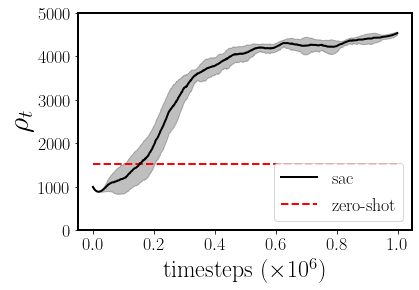

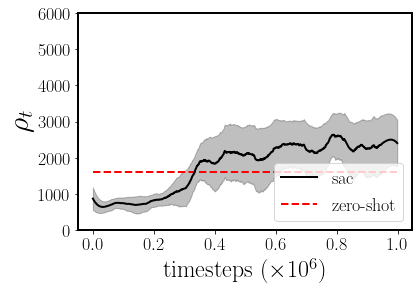

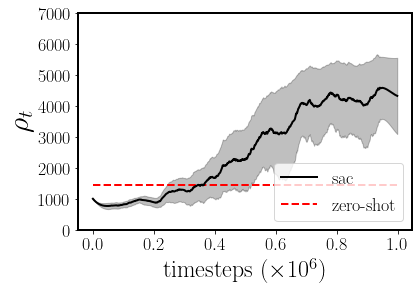

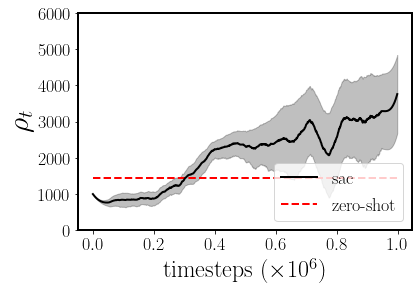

In [9]:
def plot_avg_ret(means, stds, baseline=None, fig_name=None, colors=None, labels=None, ylim_val=None):
    # params
    line_width = 2.0
    plt.figure(figsize=(6, 4))
    plt.rcParams['axes.linewidth'] = 2.0 
    x = [j/1000 for j in range(len(means[0]))]

    # plot algo stat
    for k in range(len(means)):
            plt.fill_between(x, means[k] + stds[k],  means[k] - stds[k], color=colors[k], alpha=0.25)
            plt.plot(x, means[k], lw=line_width, color=colors[k], label=labels[k])
            plt.ylim(ylim_val)

    if baseline is not None:
        plt.hlines(baseline, 0, x[-1], lw=line_width, color=colors[-1], linestyles='--', label=labels[-1])
        
    # plot properties
    plt.legend(loc='lower right')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(r'timesteps ($\times 10^6$)', fontsize=24, loc='center')
    plt.ylabel(r'$\rho_t$', fontsize=30)
    plt.legend(loc='lower right', fontsize=18)

    if fig_name is not None:
        plt.savefig(f'figures/{fig_name}.png', bbox_inches="tight")


# task 1
d1_sac = np.load('data/ant/ant_1_sac/test_ep_ret_cache.npy')
d1_apt = np.load('data/ant/ant_1_apt/test_ep_ret_cache.npy')

# task 2
d2_sac = np.load('data/ant/ant_2_sac/test_ep_ret_cache.npy')
d2_apt = np.load('data/ant/ant_2_apt/test_ep_ret_cache.npy')

# task 3
d3_sac = np.load('data/ant/ant_3_sac/test_ep_ret_cache.npy')
d3_apt = np.load('data/ant/ant_3_apt/test_ep_ret_cache.npy')

# task 4
d4_sac = np.load('data/ant/ant_4_sac/test_ep_ret_cache.npy')
d4_apt = np.load('data/ant/ant_4_apt/test_ep_ret_cache.npy')

# # calculate evaluation of zero-shot trained policy
g1 = np.load('data/ant/ant_1_sac_baseline/eval_policy_rewards.npy')
v1 = np.mean(g1)

g2 = np.load('data/ant/ant_2_sac_baseline/eval_policy_rewards.npy')
v2 = np.mean(g2)

g3 = np.load('data/ant/ant_7_sac_baseline/eval_policy_rewards.npy')
v3 = np.mean(g3)

g4 = np.load('data/ant/ant_7_sac_baseline/eval_policy_rewards.npy')
v4 = np.mean(g3)

baselines = [v1, v2, v3, v4]



# d1_means, d1_stds = plot_utils.get_stat(d1_sac, d1_apt, window=101)
# d2_means, d2_stds = plot_utils.get_stat(d2_sac, d2_apt, window=101)
# d3_means, d3_stds = plot_utils.get_stat(d3_sac, d3_apt, window=101)
# d4_means, d4_stds = plot_utils.get_stat(d4_sac, d4_apt, window=101)

# d1_baseline = v1
# d2_baseline = v2
# d3_baseline = v3
# d4_baseline = v4


# labels = [r'sac', r'apt', r'zero-shot']
# colors = ['black', 'blue', 'red']
# plot_avg_ret(d1_means, d1_stds, baseline=d1_baseline, fig_name='ppt_ant_T1_return', labels=labels, colors=colors, ylim_val=[0, 5000])
# plot_avg_ret(d2_means, d2_stds, baseline=d2_baseline, fig_name='ppt_ant_T2_return', labels=labels, colors=colors, ylim_val=[0, 6000])
# plot_avg_ret(d3_means, d3_stds, baseline=d3_baseline, fig_name='ppt_ant_T3_return', labels=labels, colors=colors, ylim_val=[0, 7000])
# plot_avg_ret(d4_means, d4_stds, baseline=d4_baseline, fig_name='ppt_ant_T4_return', labels=labels, colors=colors, ylim_val=[0, 6000])


d1_means, d1_stds = plot_utils.get_stat(d1_sac, window=101)
d2_means, d2_stds = plot_utils.get_stat(d2_sac, window=101)
d3_means, d3_stds = plot_utils.get_stat(d3_sac, window=101)
d4_means, d4_stds = plot_utils.get_stat(d4_sac, window=101)

d1_baseline = v1
d2_baseline = v2
d3_baseline = v3
d4_baseline = v4


labels = [r'sac', r'zero-shot']
colors = ['black', 'red']
plot_avg_ret(d1_means, d1_stds, baseline=d1_baseline, fig_name='ppt_ant_T1_return_1', labels=labels, colors=colors, ylim_val=[0, 5000])
plot_avg_ret(d2_means, d2_stds, baseline=d2_baseline, fig_name='ppt_ant_T2_return_1', labels=labels, colors=colors, ylim_val=[0, 6000])
plot_avg_ret(d3_means, d3_stds, baseline=d3_baseline, fig_name='ppt_ant_T3_return_1', labels=labels, colors=colors, ylim_val=[0, 7000])
plot_avg_ret(d4_means, d4_stds, baseline=d4_baseline, fig_name='ppt_ant_T4_return_1', labels=labels, colors=colors, ylim_val=[0, 6000])


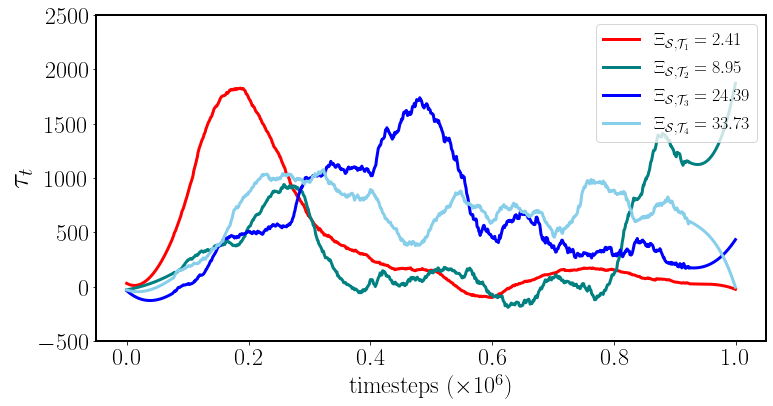

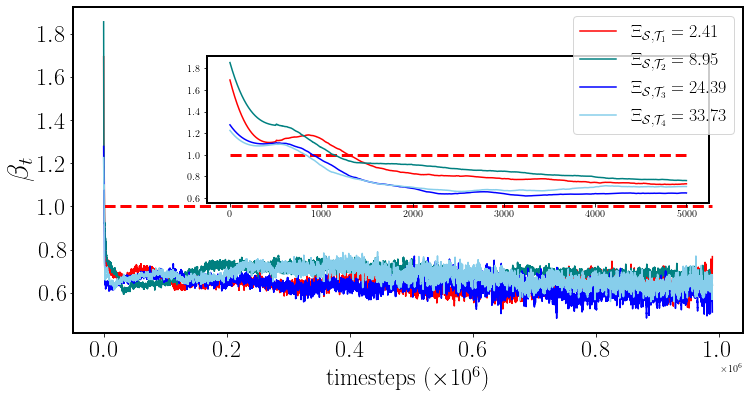

In [3]:
def plot_tau(means, stds, fig_name=None, labels=None, colors=None):

    # params
    line_width = 3.0
    error_line_width = 2.0
    markersize = 5.0

    plt.figure(figsize=(12, 6))

    # subplot 1 ---> this is the plot for: tau vs task similarity 
    for m in range(len(means)):
        x  = [i/1000 for i in range(len(means[m]))]
        plt.plot(x, means[m], lw=line_width, color=colors[m], label=labels[m])            
        plt.legend(loc='upper right', fontsize=18)
        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)
        plt.xlabel(r'timesteps $(\times 10^6)$', fontsize=24)
        plt.ylabel(r'$\tau_t$', fontsize=30)
    plt.ylim(-500, 2500)

    if fig_name is not None:
        plt.savefig(f'figures/{fig_name}.pdf', bbox_inches="tight")


def plot_adv(*args, fig_name=None, labels=None, colors=None):

    # params
    line_width = 3.0
    error_line_width = 2.0
    markersize = 5.0
    inset_window = 5000 # length of inset image
    plt.figure(figsize=(12, 6))


    # subplot 2 ---> this is the plot for beta vs task similarity 
    ax = plt.subplot()
    axin1 = ax.inset_axes([0.2, 0.4, 0.75, 0.45])
    plt.hlines(1.0, 0, len(args[0]), color='red', lw=line_width, linestyles='--')
    for m in range(len(args)): 
        x = [i/1000 for i in range(len(args[m]))]
        x_inset = [k for k in range(inset_window)]
        plt.plot(args[m], label=labels[m], color=colors[m])
        axin1.plot(args[m][:inset_window], label=labels[m], color=colors[m])
    # inset figure
    axin1.hlines(1.0, 0, inset_window, color='red', lw=line_width, linestyles='--')
    plt.legend(loc='upper right', fontsize=18)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel(r'timesteps $(\times 10^6)$', fontsize=24)
    plt.ylabel(r'$\beta_t$', fontsize=30)


    if fig_name is not None:
        plt.savefig(f'figures/{fig_name}.pdf', bbox_inches="tight")




# --------- calculate tau ------------
tau10 = d1_apt - d1_sac
tau20 = d2_apt - d2_sac
tau30 = d3_apt - d3_sac
tau40 = d4_apt - d4_sac


tau_means, tau_stds = plot_utils.get_stat(tau10, tau20, tau30, tau40, window=151)
tau_means, tau_stds = np.array(tau_means), np.array(tau_stds)

# ------------------
# load data
adv1 = np.load('data/ant/ant_1_apt/adv.npy')
adv2 = np.load('data/ant/ant_5_apt/adv.npy')
adv3 = np.load('data/ant/ant_7_apt/adv.npy')
adv4 = np.load('data/ant/ant_4_apt/adv.npy')

# smooth using fixed moving window size
adv1 = plot_utils.smooth(adv1, window=1000)
adv2 = plot_utils.smooth(adv2, window=1000)
adv3 = plot_utils.smooth(adv3, window=1000)
adv4 = plot_utils.smooth(adv4, window=1000)

labels = [r'$\Xi_{\mathcal{S}, \mathcal{T}_1} = 2.41$', r'$\Xi_{\mathcal{S}, \mathcal{T}_2} = 8.95$', 
            r'$\Xi_{\mathcal{S}, \mathcal{T}_3} = 24.39$', r'$\Xi_{\mathcal{S}, \mathcal{T}_4} = 33.73$']
colors = ['red', 'teal', 'blue', 'skyblue']

plot_tau(tau_means, tau_stds, fig_name='ant_tau', labels=labels, colors=colors)
plot_adv(adv1, adv2, adv3, adv4, fig_name='ant_adv', labels=labels, colors=colors)